In [36]:
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Import dataset
# Note: Excel file was converted to a CSV file

df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")

# Let's see what we're working with!
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [38]:
# some useful columns based on the current columns
df['created_date'] = pd.to_datetime(df['created_at']).dt.date
df['created_time'] = pd.to_datetime(df['created_at']).dt.time
df["amount_per_shoe"] = df["order_amount"] / df["total_items"]

In [39]:
# Handy function that shows what the current dataframe looks like and how close the mean is to the median

def update(df):
    print("Current Avg", df["order_amount"].mean(), "Current Median", df["order_amount"].median())
    display(df.head())
    

In [40]:
update(df)

Current Avg 3145.128 Current Median 284.0


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_date,created_time,amount_per_shoe
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13,12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03,17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14,04:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26,12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,2017-03-01,04:35:11,156.0


In [41]:
# avg abnormally high, so we sort by price and judge the validity of the pricier purchases

df = df.sort_values(by=["order_amount", "total_items"], ascending=False)
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_date,created_time,amount_per_shoe
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,2017-03-07,04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,2017-03-04,04:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,2017-03-02,04:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,2017-03-24,04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,2017-03-15,04:00:00,352.0


In [42]:
# filter out orders that are suspiciously similar
# we want unique (shop_id, user_id, order_amount, payment_method, time) tuples

filterColumns =  ("shop_id", "user_id", "order_amount", "payment_method", "created_time")
filterSubsetSize = len(filterColumns)
for subsetFilterColumns in it.combinations((filterColumns), filterSubsetSize):
    df = df.drop_duplicates(subset=subsetFilterColumns, keep=False)
    
update(df)

Current Avg 754.0919125025085 Current Median 284.0


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_date,created_time,amount_per_shoe
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,2017-03-27,22:51:43,25725.0
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34,2017-03-04,04:37:34,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,2017-03-27,09:27:20,25725.0
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35,2017-03-25,01:19:35,25725.0
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25,2017-03-22,07:33:25,25725.0


In [48]:
# Another handy function that allows us to locate outliers and view the shape of the data

def boxplot(df):
    # amount_per_shoe
    sns.boxplot(x=df.drop_duplicates(subset=["shop_id"], keep="first")["amount_per_shoe"])
    plt.show()

    # total_items
    sns.boxplot(x=df["total_items"])
    plt.show()
    
    # order_amount
    sns.boxplot(x=df["order_amount"])
    plt.show()

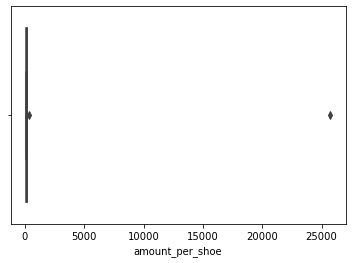

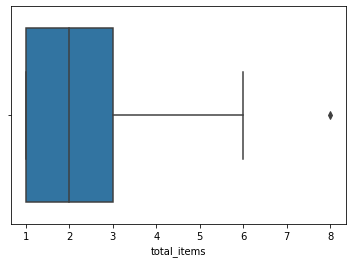

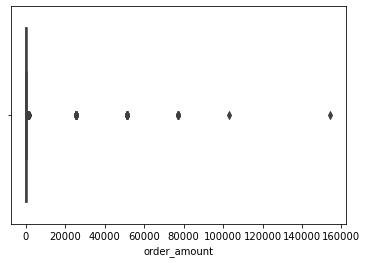

In [49]:
boxplot(df)

Current Avg 302.58051448247926 Current Median 284.0


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_date,created_time,amount_per_shoe
1364,1365,42,797,1760,5,cash,2017-03-10 6:28:21,2017-03-10,06:28:21,352.0
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34,2017-03-13,02:38:34,352.0
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22,2017-03-12,23:00:22,352.0
3538,3539,43,830,1086,6,debit,2017-03-17 19:56:29,2017-03-17,19:56:29,181.0
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:18,2017-03-07,17:05:18,133.0


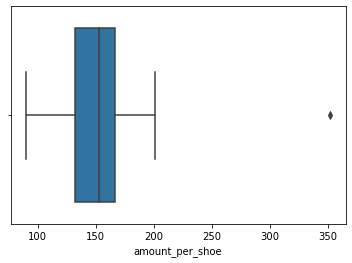

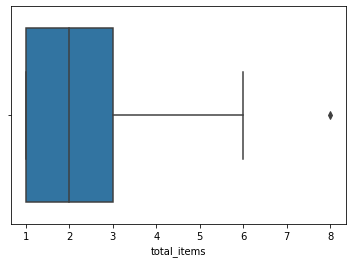

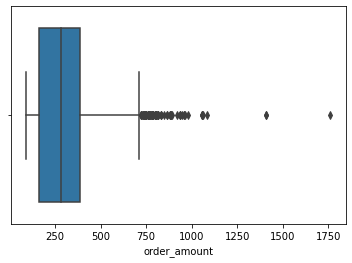

In [50]:
# remove obvious outlier and review again
dfOutliersRemoved = df[df.amount_per_shoe != 25725]
update(dfOutliersRemoved)
boxplot(dfOutliersRemoved)

In [51]:
# inspect outliers for validity

dfOutliers = df[df.amount_per_shoe == 25725]
display(dfOutliers.head(15))

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_date,created_time,amount_per_shoe
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,2017-03-27,22:51:43,25725.0
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34,2017-03-04,04:37:34,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,2017-03-27,09:27:20,25725.0
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35,2017-03-25,01:19:35,25725.0
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25,2017-03-22,07:33:25,25725.0
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46,2017-03-16,03:45:46,25725.0
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05,2017-03-16,09:45:05,25725.0
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26,2017-03-16,14:13:26,25725.0
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32,2017-03-18,09:25:32,25725.0
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35,2017-03-09,15:21:35,25725.0


In [53]:
# True AOV
print("Average Order Amount:", "%.2f" % df["order_amount"].mean())

# Other important metrics
print("Average Order Amount (Outliers Removed)", "%.2f" % dfOutliersRemoved["order_amount"].mean())
print("Median Order Amount:", "%.2f" %  df["order_amount"].median())
print("Median Order Amount (Outliers Removed):", "%.2f" % dfOutliersRemoved["order_amount"].median())
print("Average Cost per Item:", "%.2f" % (df["order_amount"].sum() / df["total_items"].sum()))
print("Average Cost per Item (Outliers Removed):", "%.2f" % (dfOutliersRemoved["order_amount"].sum() / dfOutliersRemoved["total_items"].sum()))

Average Order Amount: 754.09
Average Order Amount (Outliers Removed) 302.58
Median Order Amount: 284.00
Median Order Amount (Outliers Removed): 284.00
Average Cost per Item: 378.18
Average Cost per Item (Outliers Removed): 151.69
